# CStreet: a computed <ins>C</ins>ell <ins>S</ins>tate <ins>tr</ins>ajectory inf<ins>e</ins>r<ins>e</ins>nce method for <ins>t</ins>ime-series single-cell RNA-seq data

## This is a tutorial written using Jupyter Notebook.

### Step 1. CStreet installation following the [tutorial](https://github.com/yw-Hua/CStreet).

### Step 2. Input preparation

CStreet utilizes time-series expression levels in tab-delimited format or AnnData format as input. 

The cell state information can be generated using the built-in clustering function of CStreet or input by the user. 

We provided a small [test dataset](https://github.com/yw-Hua/CStreet/tree/master/test/test_data) containing normalized expression levels and the state information at three time points. 

### Step 3. Operation of CStreet

### 3.1 Load required packages

In [1]:
from cstreet import *
import pandas as pd

### 3.2 Read expression matrix and cell state information

Expression data: Expression matrix containing the time-series expression level as reads counts or normalized values in tab delimited format, and anndata format are accepted as the input of CStreet. (For example: ExpressionMatrix_t1.txt ExpressionMatrix_t2.txt ExpressionMatrix_t3.txt)


In [2]:
data_t1=pd.read_table('ExpressionMatrix_t1.txt',header=0, sep="\t",index_col=0) 
data_t2=pd.read_table('ExpressionMatrix_t2.txt',header=0, sep="\t",index_col=0)
data_t3=pd.read_table('ExpressionMatrix_t3.txt',header=0, sep="\t",index_col=0)

Cell states info: The cell states information can be inputted by the user or generated using the internal clustering function of CStreet. (For example: CellStates_t1.txt CellStates_t2.txt CellStates_t3.txt)

In [3]:
state_t1=pd.read_table('CellStates_t1.txt',header=None, sep="\t",index_col=0) 
state_t2=pd.read_table('CellStates_t2.txt',header=None, sep="\t",index_col=0)
state_t3=pd.read_table('CellStates_t3.txt',header=None, sep="\t",index_col=0)

### 3.3 Create a new CStreet object

In [4]:
cdata=CStreetData()

### 3.4 Add data into CStreet object

In [5]:
cdata.add_new_timepoint_scdata(data_t1,list(state_t1[1]))
cdata.add_new_timepoint_scdata(data_t2,list(state_t2[1]))
cdata.add_new_timepoint_scdata(data_t3,list(state_t3[1]))

AnnData object can be inputted as well. 


In [6]:
#cdata.timepoint_scdata_dict[1]=anndata_t1
#cdata.timepoint_scdata_dict[2]=anndata_t2
#cdata.timepoint_scdata_dict[3]=anndata_t3

In [7]:
cdata.timepoint_scdata_dict[1]

AnnData object with n_obs × n_vars = 200 × 2000
    obs: 'scdata_cluster'
    uns: 'cluster_flag'

### 3.5 Custom parameters

In [8]:
cdata.params


#Step0:basic params# 
Output_Dir=./
Output_Name=CStreet

#Step1:cell_cluster# 
CellClusterParam_PCAn=10
CellClusterParam_k=15
CellClusterParam_Resolution=0.1

#Step2:gene and cell filter#
Switch_DeadCellFilter=True
Threshold_MitoPercent=0.2
Switch_LowCellNumGeneFilter=True
Threshold_LowCellNum=3
Switch_LowGeneCellsFilter=True
Threshold_LowGeneNum=200

#Step3:normalize#
Switch_Normalize=True
Threshold_NormalizeBase=1000000
Switch_LogTransform=True

#Step4:get_graph#
WithinTimePointParam_PCAn=10
WithinTimePointParam_k=15
BetweenTimePointParam_PCAn=10
BetweenTimePointParam_k=15

#Step5: calculate probability#
ProbParam_RandomSeed=0
ProbParam_SamplingSize=5

#Step6:plot graph#
FigureParam_FigureSize=(6, 7)
FigureParam_LabelBoxWidth=10
Threshold_MaxOutDegree=10
Threshold_MinCellNumofStates=0

In [9]:
cdata.params.FigureParam_LabelBoxWidth=8

### 3.6 Run CStreet

#### 3.6.1 step by step

In [10]:
cdata.cell_clusters(CellClusterParam_PCAn=10,CellClusterParam_k=15,CellClusterParam_Resolution=1,Switch_Normalize=True,Switch_LogTransform=True)


[Function: cell_clusters start...]

timepoint:1
clusters have been given
timepoint:2
clusters have been given
timepoint:3
clusters have been given

[Function: cell_clusters finished, spent time: 0.02s]



In [11]:
cdata.filter_dead_cell(Threshold_MitoPercent=0.2)


[Function: filter_dead_cell start...]

timepoint:1
filtered out 0 cells that are detected in more than 0.2 mito percent

timepoint:2
filtered out 0 cells that are detected in more than 0.2 mito percent

timepoint:3
filtered out 0 cells that are detected in more than 0.2 mito percent


[Function: filter_dead_cell finished, spent time: 0.02s]



In [12]:
cdata.filter_lowcell_gene(Threshold_LowCellNum=3)

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.



[Function: filter_lowcell_gene start...]

timepoint:1
filtered out 31 genes that are detected in less than 3 cells

timepoint:2
filtered out 30 genes that are detected in less than 3 cells

timepoint:3
filtered out 37 genes that are detected in less than 3 cells


[Function: filter_lowcell_gene finished, spent time: 0.04s]



In [13]:
cdata.filter_lowgene_cells(Threshold_LowGeneNum=200)


[Function: filter_lowgene_cells start...]

timepoint:1
filtered out 0 cells that are detected in less than 200 genes

timepoint:2
filtered out 0 cells that are detected in less than 200 genes

timepoint:3
filtered out 0 cells that are detected in less than 200 genes


[Function: filter_lowgene_cells finished, spent time: 0.02s]



In [14]:
cdata.normalize_data(Threshold_NormalizeBase=1000000)


[Function: normalize_data start...]

Normalize data to 1000000 count ...

[Function: normalize_data finished, spent time: 0.00s]



In [15]:
cdata.log_transform()


[Function: log_transform start...]


[Function: log_transform finished, spent time: 0.02s]



In [16]:
cdata.get_knn_within(WithinTimePointParam_PCAn=10,WithinTimePointParam_k=15)


[Function: get_knn_within start...]

timepoint:1

timepoint:2

timepoint:3


[Function: get_knn_within finished, spent time: 2.61s]



In [17]:
cdata.get_knn_between(BetweenTimePointParam_PCAn=10,BetweenTimePointParam_k=15)


[Function: get_knn_between start...]

timepoint between 1 and 2 
timepoint between 2 and 3 

[Function: get_knn_between finished, spent time: 3.15s]



In [18]:
cdata.get_knn_graph()


[Function: get_knn_graph start...]

timepoint:1
timepoint:2
timepoint:3
timepoint between 1 and 2 
timepoint between 2 and 3 

[Function: get_knn_graph finished, spent time: 0.02s]



In [19]:
cdata.filter_knn_graph()


[Function: filter_knn_graph start...]

timepoint:1
timepoint:2
timepoint:3
timepoint between 1 and 2 
timepoint between 2 and 3 

[Function: filter_knn_graph finished, spent time: 0.05s]



In [20]:
cdata.get_state_trajectory(ProbParam_SamplingSize=5,ProbParam_RandomSeed=0)


[Function: get_state_trajectory start...]

timepoint:1
timepoint:2
timepoint:3

[Function: get_state_trajectory finished, spent time: 10.76s]




[Function: get_knn_nxG start...]

timepoint:1


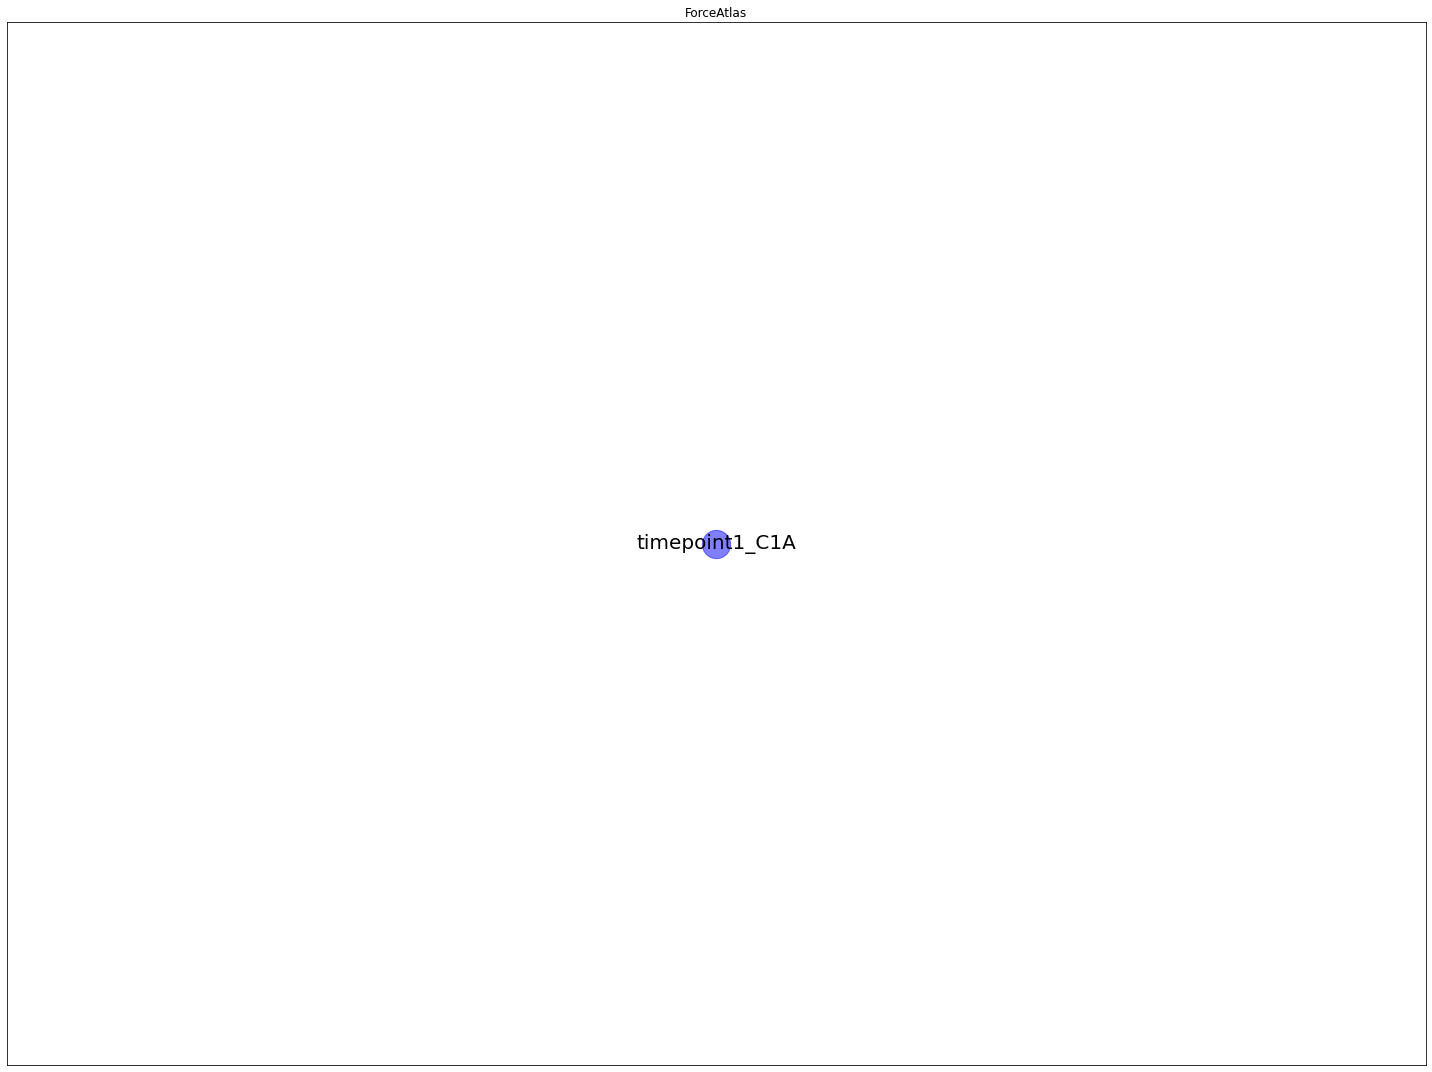

100%|██████████| 2000/2000 [00:00<00:00, 97917.68it/s]

timepoint:2
BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


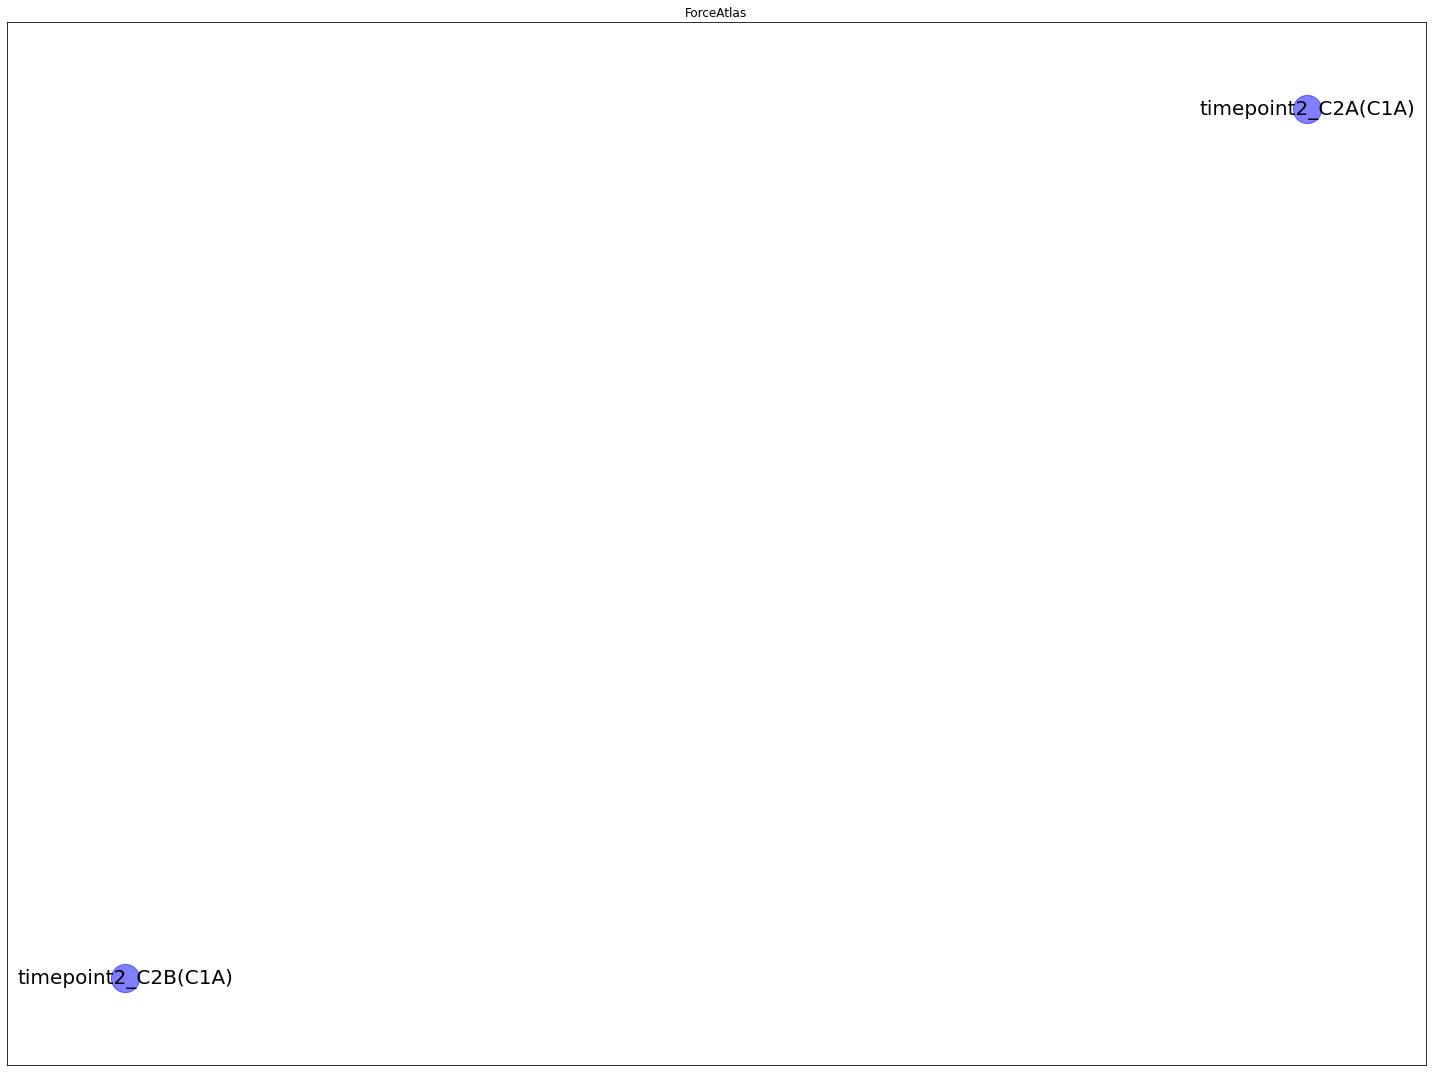

100%|██████████| 2000/2000 [00:00<00:00, 94050.07it/s]

timepoint:3
BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


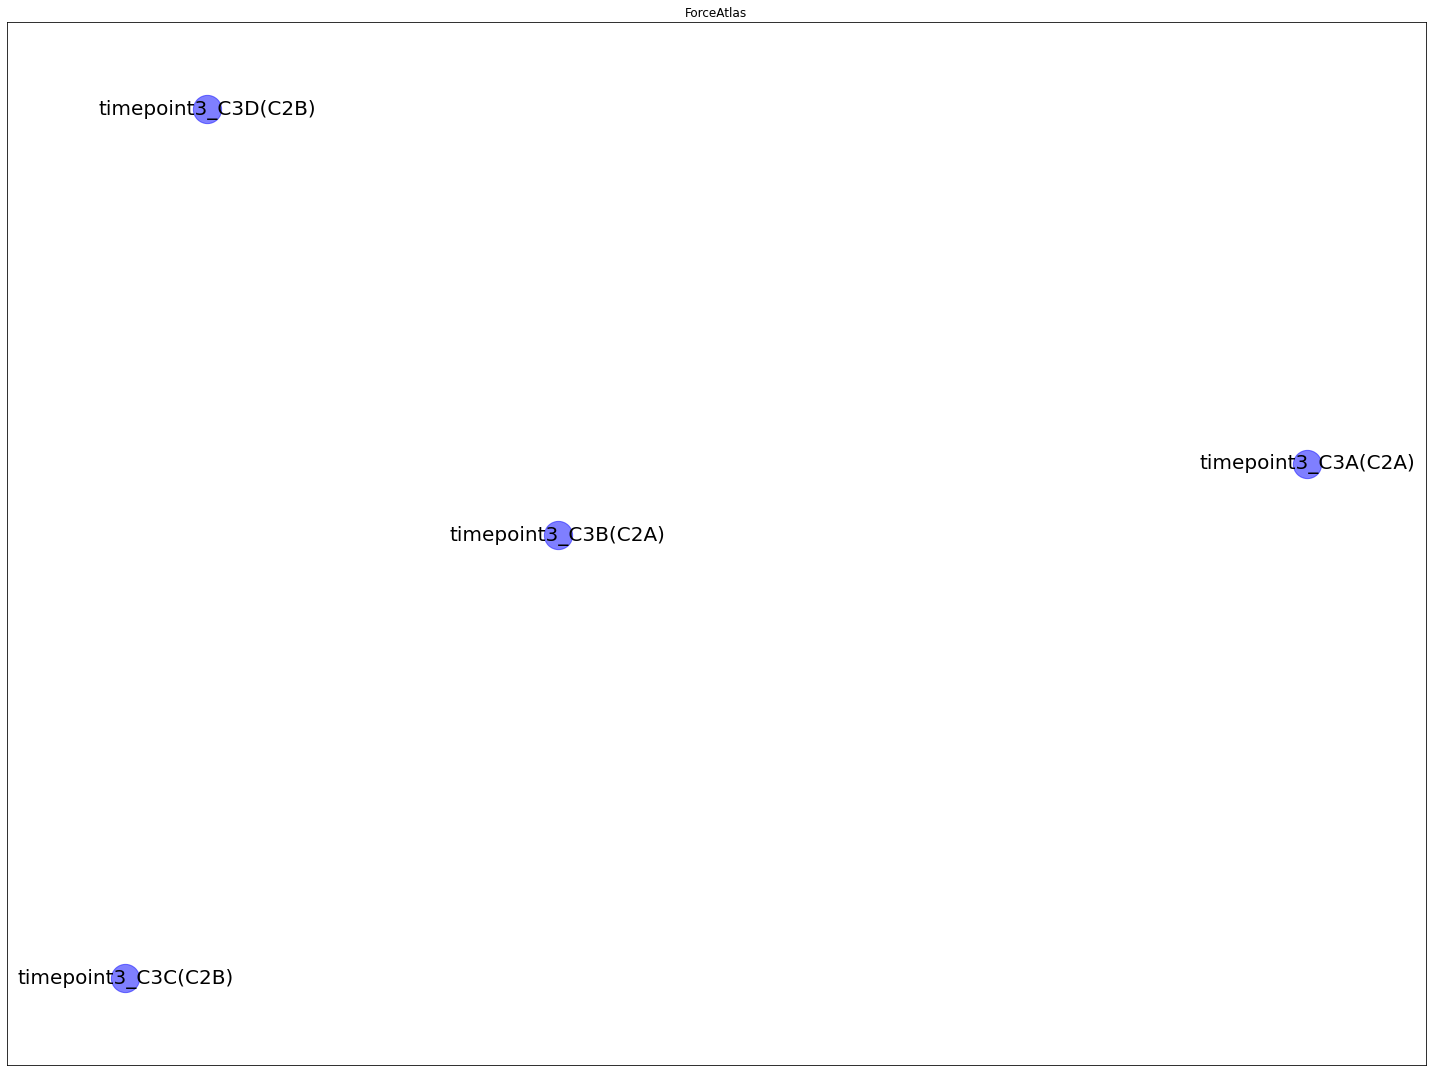


[Function: get_knn_nxG finished, spent time: 1.10s]



In [21]:
cdata.get_knn_nxG(Threshold_MaxOutDegree=10,Threshold_MinCellNumofStates=1)


[Function: draw_nxG start...]



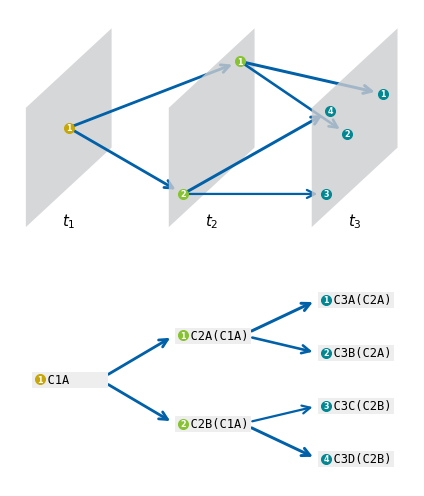


[Function: draw_nxG finished, spent time: 1.01s]



In [22]:
cdata.draw_nxG(FigureParam_FigureSize=(6,7),FigureParam_LabelBoxWidth=8)

In [23]:
cdata.output_results()


[Function: output_results start...]

timepoint:1
timepoint:2
timepoint:3

[Function: output_results finished, spent time: 0.03s]



#### 3.6.2 one step

In [24]:
cdata=CStreetData()
state_t1=pd.read_table('CellStates_t1.txt',header=None, sep="\t",index_col=0) 
state_t2=pd.read_table('CellStates_t2.txt',header=None, sep="\t",index_col=0)
state_t3=pd.read_table('CellStates_t3.txt',header=None, sep="\t",index_col=0)

Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.
Trying to set attribute `.var` of view, copying.



[Function: run_cstreet start...]


[Function: cell_clusters start...]

The result folder ./CStreet exists! CStreet overwrite it. To avoid the overwriting, try the -o parameter.
timepoint:1
clusters have been given
timepoint:2
clusters have been given
timepoint:3
clusters have been given

[Function: cell_clusters finished, spent time: 0.01s]


[Function: filter_dead_cell start...]

timepoint:1
filtered out 0 cells that are detected in more than 0.2 mito percent

timepoint:2
filtered out 0 cells that are detected in more than 0.2 mito percent

timepoint:3
filtered out 0 cells that are detected in more than 0.2 mito percent


[Function: filter_dead_cell finished, spent time: 0.02s]


[Function: filter_lowcell_gene start...]

timepoint:1
filtered out 0 genes that are detected in less than 3 cells

timepoint:2
filtered out 0 genes that are detected in less than 3 cells

timepoint:3
filtered out 0 genes that are detected in less than 3 cells


[Function: filter_lowcell_gene finished, spent 

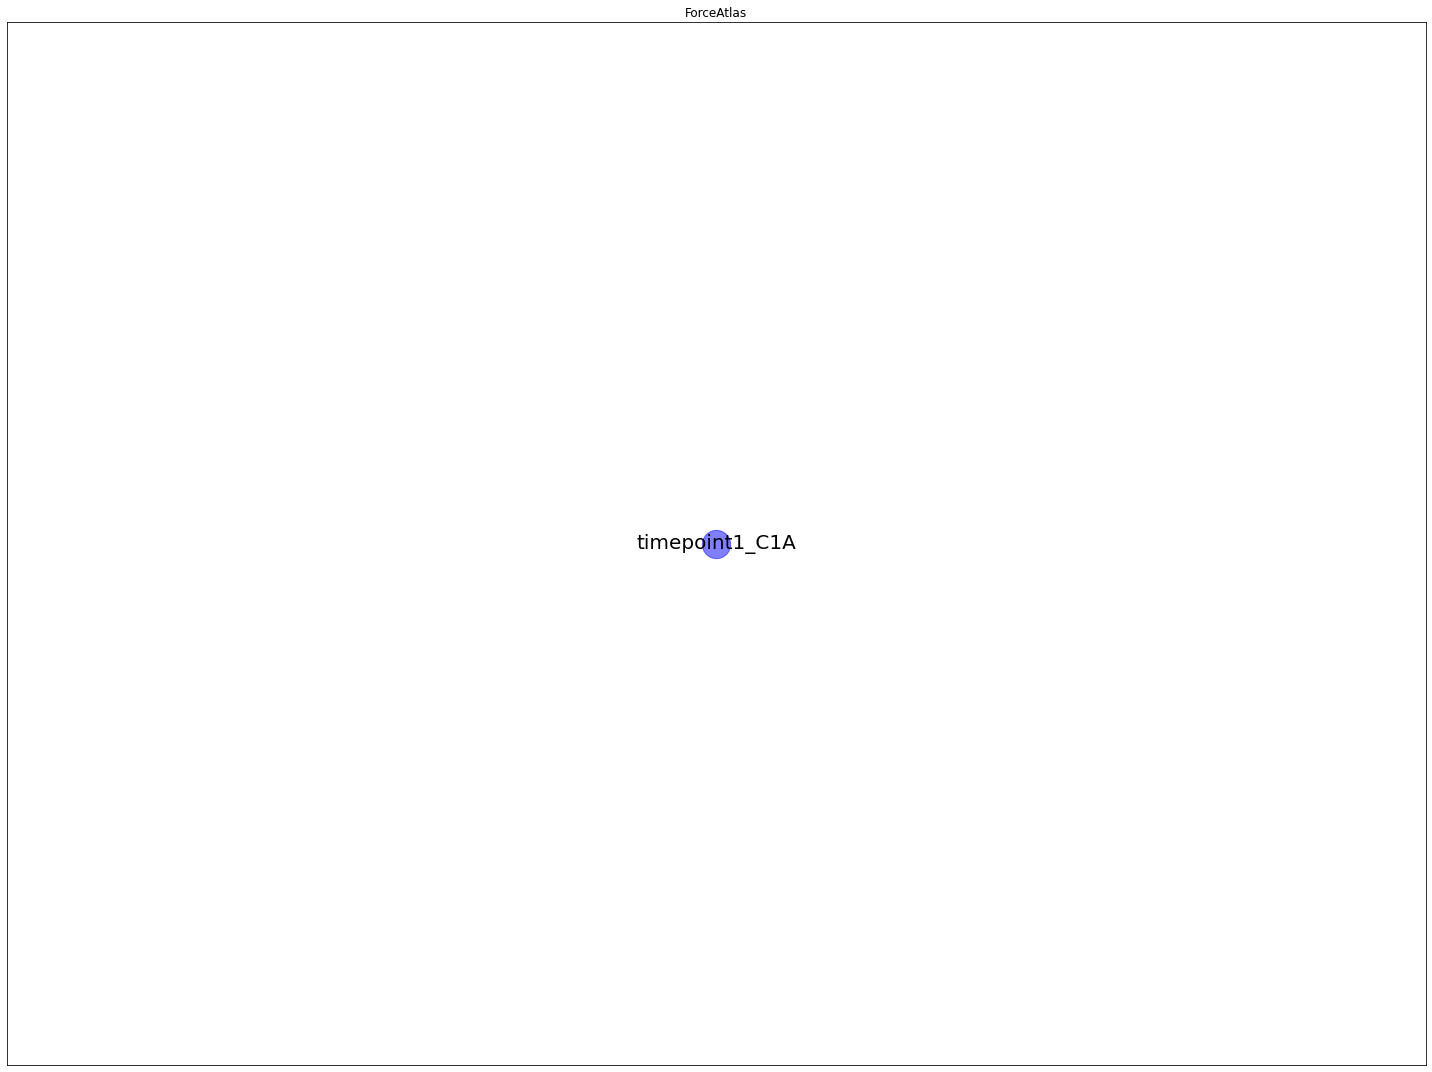

100%|██████████| 2000/2000 [00:00<00:00, 98465.93it/s]

timepoint:2
BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


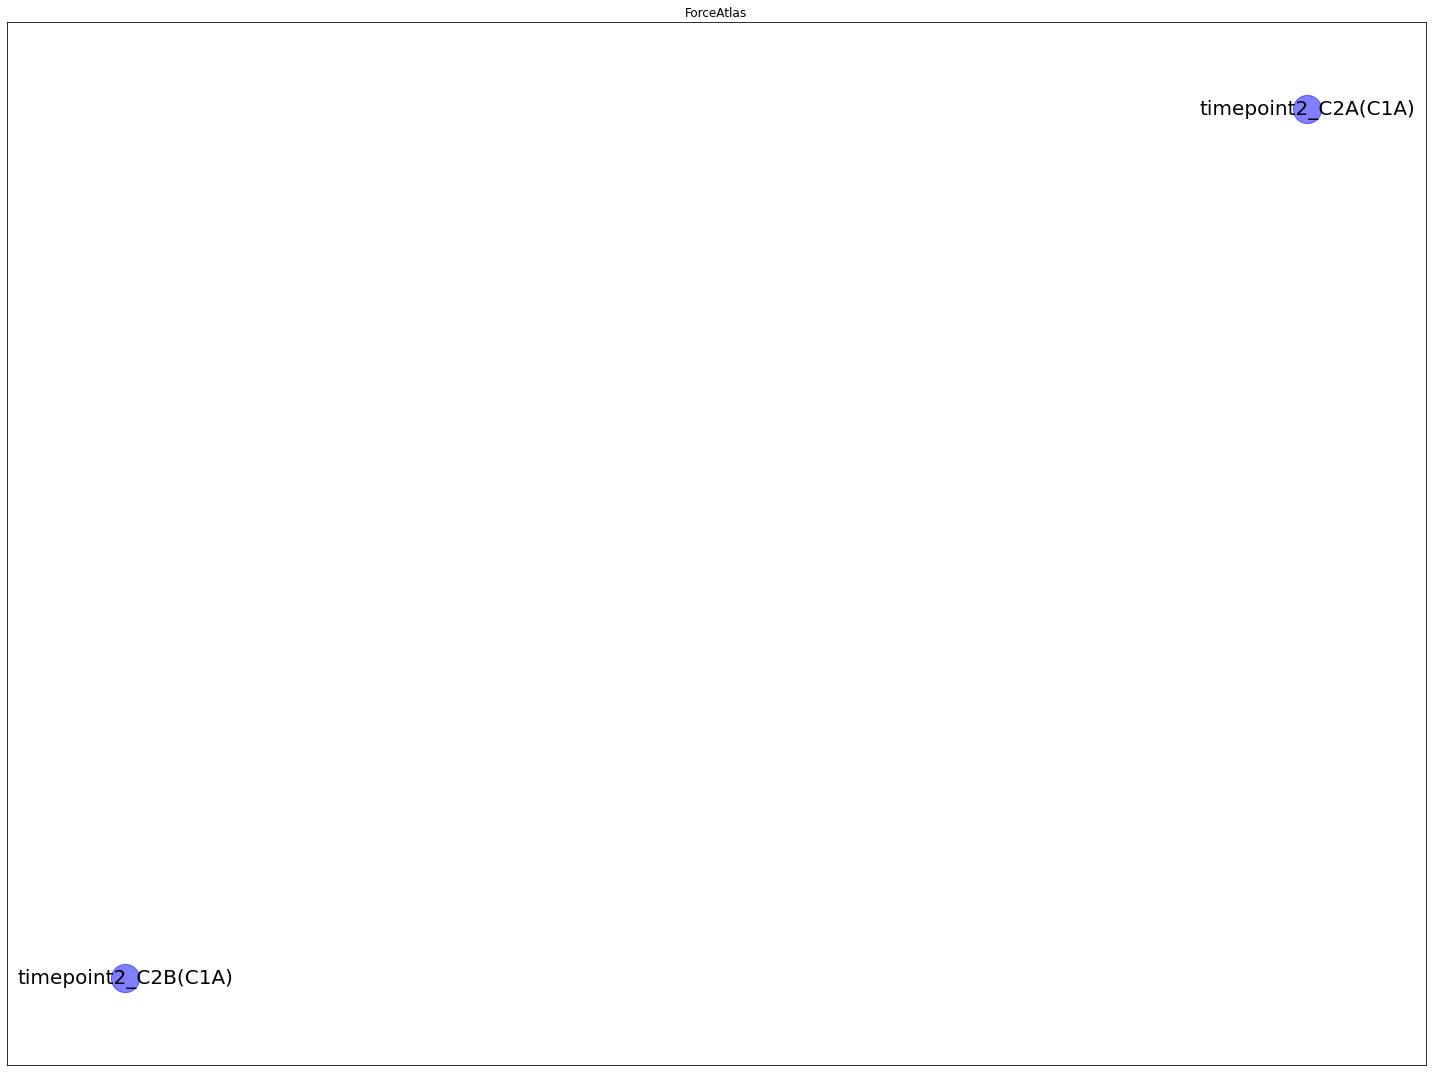

100%|██████████| 2000/2000 [00:00<00:00, 93624.95it/s]

timepoint:3
BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


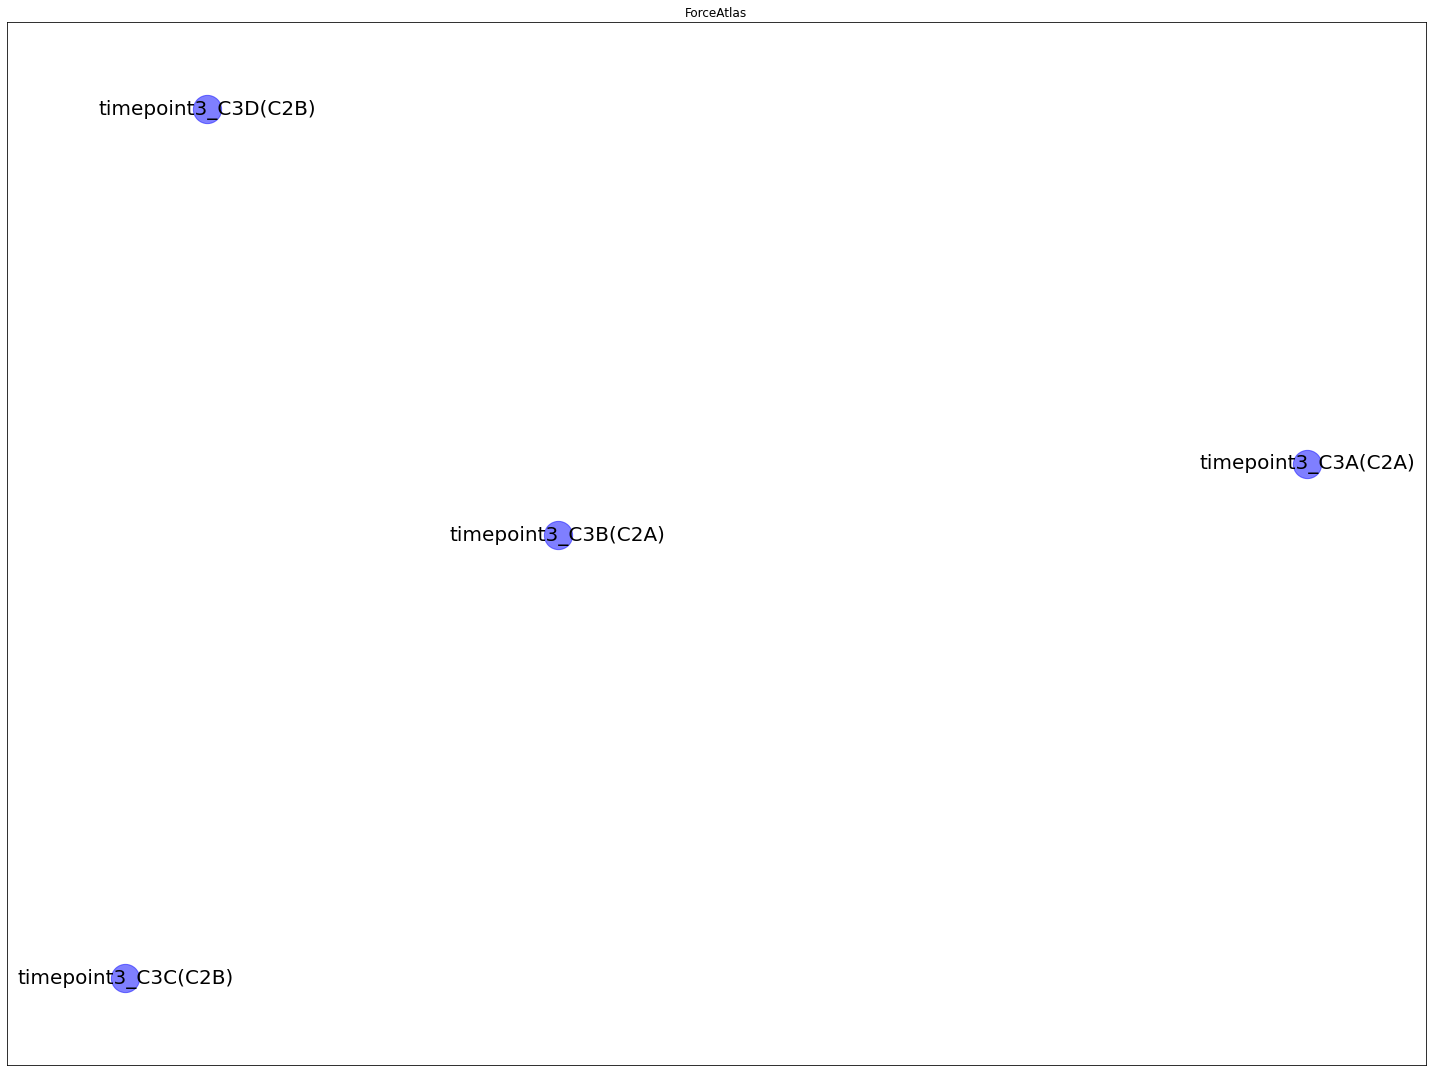


[Function: get_knn_nxG finished, spent time: 1.03s]


[Function: draw_nxG start...]



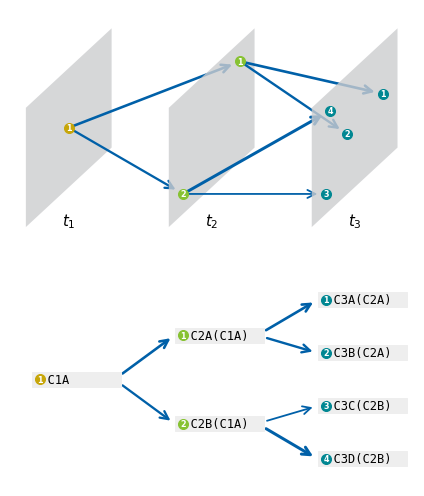


[Function: draw_nxG finished, spent time: 0.86s]


[Function: output_results start...]

timepoint:1
timepoint:2
timepoint:3

[Function: output_results finished, spent time: 0.02s]


[Function: run_cstreet finished, spent time: 18.72s]



In [25]:
cdata.run_cstreet()